# Name: Pranav Kathar

# Bharat Intern Task 1
## Stock Price prediction using LSTM 

# Objective process the CSV data of stock price of company(Tesla) and predicts its price by using LSTM.


In [93]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [94]:
data= pd.read_csv('tesla.csv')

# Data Exploration

In [95]:
# Double check the result
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [96]:
# Show the top down 5 rows
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2/3/2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [98]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


# Checking missing values

In [99]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visualization

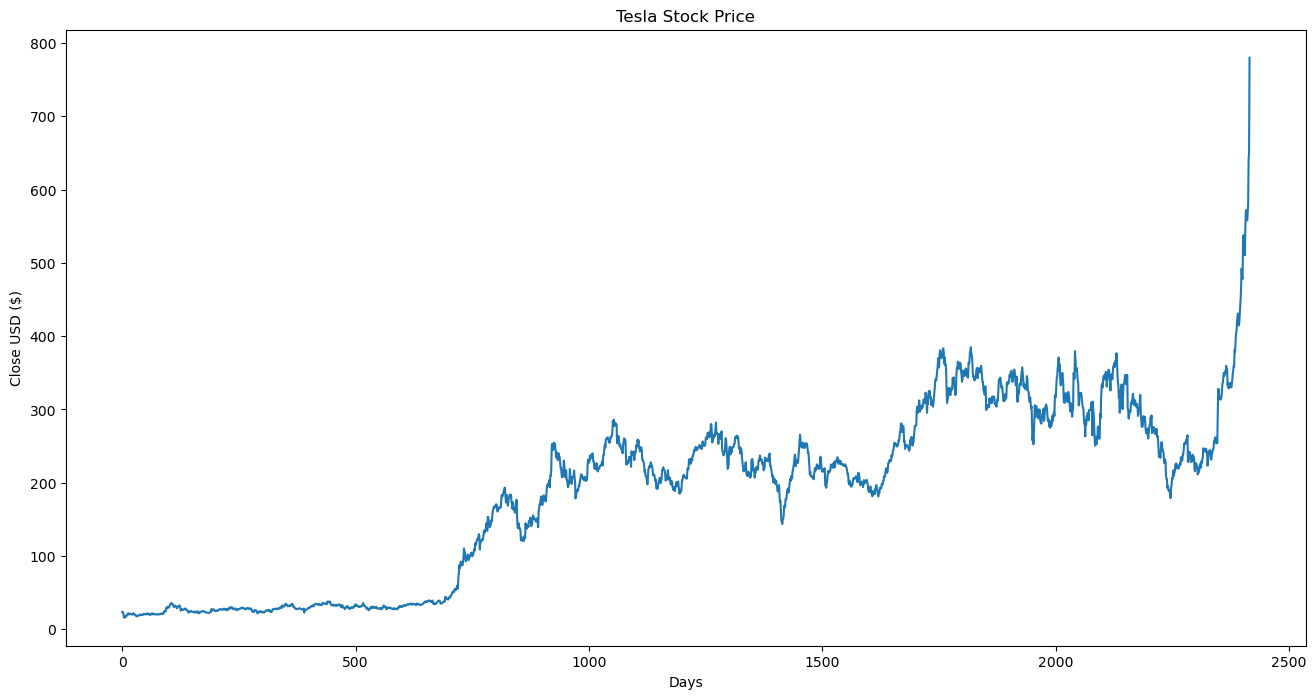

In [100]:
plt.figure(figsize=(16,8))
plt.title('Tesla Stock Price')
plt.xlabel('Days')
plt.ylabel('Close USD ($)') 
plt.plot(data['Close'])
plt.show() 

In [101]:
# Extract the 'Close' prices
data = data[['Close']]
data = data.dropna()

# Normalizing the Data

In [102]:
# Normalize the data using Min-Max scaling
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [103]:
# Create sequences for LSTM
sequence_length = 30  
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])

X, y = np.array(X), np.array(y)

# Splitting Data into a Training set and a Test set

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM Model 
Use mean squared error loss function
 and Use optimization function adam  

In [105]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model using train data

In [106]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
60/60 [==============================] - 5s 19ms/step - loss: 0.0049
Epoch 2/50
60/60 [==============================] - 1s 19ms/step - loss: 5.8431e-04
Epoch 3/50
60/60 [==============================] - 1s 19ms/step - loss: 4.7213e-04
Epoch 4/50
60/60 [==============================] - 1s 19ms/step - loss: 4.4620e-04
Epoch 5/50
60/60 [==============================] - 1s 19ms/step - loss: 4.3165e-04
Epoch 6/50
60/60 [==============================] - 1s 19ms/step - loss: 3.7087e-04
Epoch 7/50
60/60 [==============================] - 1s 20ms/step - loss: 3.6656e-04
Epoch 8/50
60/60 [==============================] - 1s 20ms/step - loss: 3.6253e-04
Epoch 9/50
60/60 [==============================] - 1s 19ms/step - loss: 3.3601e-04
Epoch 10/50
60/60 [==============================] - 1s 19ms/step - loss: 2.8809e-04
Epoch 11/50
60/60 [==============================] - 1s 19ms/step - loss: 2.6394e-04
Epoch 12/50
60/60 [==============================] - 1s 19ms/step - loss: 2.94

In [65]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:}")
print(f"Test Loss: {test_loss:}")

Train Loss: [0.45553502440452576, 0.0005241089966148138]
Test Loss: [0.43643683195114136, 0.0]


In [66]:
# Make predictions
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
y_test = scaler.inverse_transform(y_test)

15/15 [==============================] - 1s 12ms/step


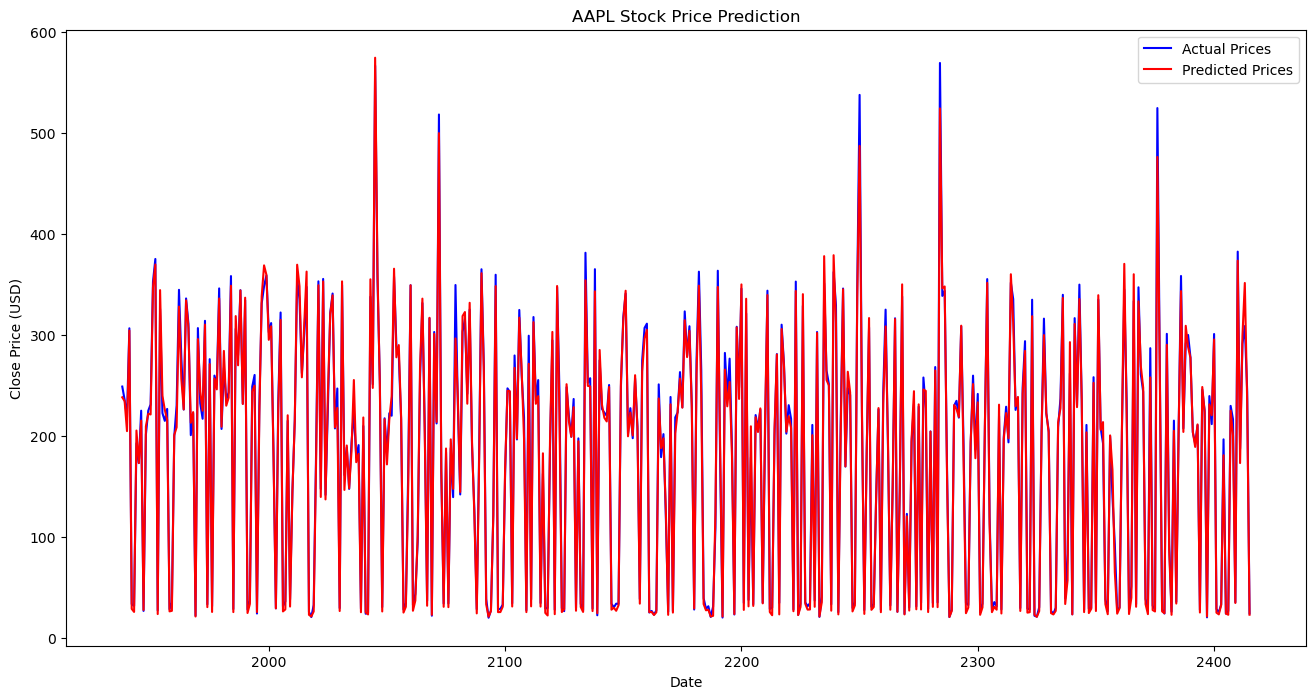

In [67]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(predicted_stock_prices):], predicted_stock_prices, label='Predicted Prices', color='red')
plt.legend()
plt.show()

# Print the predicted value

In [68]:
print(y_test)

[[248.919998]
 [235.839996]
 [218.550003]
 [306.649994]
 [ 33.299999]
 [ 31.540001]
 [192.690002]
 [173.149994]
 [225.009995]
 [ 26.620001]
 [201.350006]
 [225.      ]
 [231.279999]
 [352.790009]
 [375.339996]
 [ 27.08    ]
 [325.839996]
 [222.559998]
 [214.929993]
 [226.75    ]
 [ 28.280001]
 [ 34.939999]
 [199.559998]
 [230.289993]
 [344.779999]
 [277.450012]
 [226.160004]
 [336.220001]
 [311.299988]
 [200.770004]
 [222.270004]
 [ 21.84    ]
 [306.850006]
 [232.320007]
 [217.020004]
 [314.070007]
 [ 33.130001]
 [276.059998]
 [ 31.15    ]
 [259.790009]
 [250.800003]
 [346.170013]
 [206.929993]
 [267.470001]
 [235.580002]
 [243.179993]
 [358.390015]
 [ 28.43    ]
 [306.089996]
 [279.859985]
 [344.429993]
 [231.949997]
 [334.459991]
 [ 27.969999]
 [ 36.849998]
 [248.910004]
 [260.410004]
 [ 24.030001]
 [229.639999]
 [331.290009]
 [348.420013]
 [359.01001 ]
 [302.769989]
 [311.809998]
 [182.800003]
 [ 29.18    ]
 [233.100006]
 [322.309998]
 [ 31.049999]
 [ 35.959999]
 [215.      ]
 [ 37.

# Done!